In [4]:
import spatialdata
import spatialdata_io

In [3]:
path_to_image = '../data/Rectangle/Rectangle.ome.tif'
path_to_mask = '../data/Rectangle/Rectangle_mask.tif'
path_to_projection = '../data/Rectangle/Rectangle_projection.ome.tif'

In [5]:
sdata = spatialdata.SpatialData()

In [6]:
sdata

SpatialData object
with coordinate systems:

In [ ]:
sdata

In [7]:
from scipy.datasets import face

# raw data
image = face()
print(type(image))
image.shape

<class 'numpy.ndarray'>


(768, 1024, 3)

In [8]:
spatialdata.models.Image2DModel().validate(image)

ValueError: Unsupported data type: <class 'numpy.ndarray'>. Please use .parse() from Image2DModel, Image3DModel, Labels2DModel or Labels3DModel to construct data that is guaranteed to be valid.

In [9]:
parsed_image = spatialdata.models.Image2DModel.parse(image, dims=('y', 'x', 'c'))

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           


In [11]:
type(parsed_image)

xarray.core.dataarray.DataArray

In [10]:
spatialdata.models.Image2DModel().validate(parsed_image)

In [12]:
parsed_image

<xarray.DataArray 'image' (c: 3, y: 768, x: 1024)> Size: 2MB
dask.array<transpose, shape=(3, 768, 1024), dtype=uint8, chunksize=(3, 768, 1024), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 24B 0 1 2
  * y        (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 764.5 765.5 766.5 767.5
  * x        (x) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
Attributes:
    transform:  {'global': Identity }

In [13]:
spatialdata.transformations.get_transformation(parsed_image)

Identity 

In [14]:
spatialdata.transformations.remove_transformation(parsed_image)

In [16]:
parsed_image = spatialdata.models.Image2DModel.parse(
    parsed_image,
    transformations={"scale_space": spatialdata.transformations.Scale([2.0], axes=("x",)), 
                    "another_space": spatialdata.transformations.Scale([2.0, 3.0], 
                    axes=("y", "x"))},
)

In [17]:
parsed_image

<xarray.DataArray 'image' (c: 3, y: 768, x: 1024)> Size: 2MB
dask.array<transpose, shape=(3, 768, 1024), dtype=uint8, chunksize=(3, 768, 1024), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 24B 0 1 2
  * y        (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 764.5 765.5 766.5 767.5
  * x        (x) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
Attributes:
    transform:  {'scale_space': Scale (x)\n    [2.], 'another_space': Scale (...

In [18]:
from spatialdata.models import get_axes_names

In [19]:
get_axes_names(parsed_image)

('c', 'y', 'x')

In [27]:
print(type(image), "\n",
type(parsed_image))

<class 'numpy.ndarray'> 
 <class 'xarray.core.dataarray.DataArray'>


In [30]:
parsed_image

<xarray.DataArray 'image' (c: 3, y: 768, x: 1024)> Size: 2MB
dask.array<transpose, shape=(3, 768, 1024), dtype=uint8, chunksize=(3, 768, 1024), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 24B 0 1 2
  * y        (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 764.5 765.5 766.5 767.5
  * x        (x) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
Attributes:
    transform:  {'scale_space': Scale (x)\n    [2.], 'another_space': Scale (...

In [32]:
parsed = spatialdata.models.Image2DModel.parse(image, dims=('y', 'x', 'c'))

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           


In [35]:
print(type(parsed), "\n",
    type(parsed.data))

<class 'xarray.core.dataarray.DataArray'> 
 <class 'dask.array.core.Array'>


In [36]:
parsed.data = parsed.data.rechunk((1, 100, 100))

In [37]:
parsed

<xarray.DataArray 'image' (c: 3, y: 768, x: 1024)> Size: 2MB
dask.array<rechunk-merge, shape=(3, 768, 1024), dtype=uint8, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 24B 0 1 2
  * y        (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 764.5 765.5 766.5 767.5
  * x        (x) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
Attributes:
    transform:  {'global': Identity }

In [40]:
# the c coordinates can be set by passing the c_coords argument
parsed = spatialdata.models.Image2DModel.parse(image, dims=("y", "x", "c"), c_coords=["r", "g", "b"])
display(parsed)

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           


<xarray.DataArray 'image' (c: 3, y: 768, x: 1024)> Size: 2MB
dask.array<transpose, shape=(3, 768, 1024), dtype=uint8, chunksize=(3, 768, 1024), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 764.5 765.5 766.5 767.5
  * x        (x) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
Attributes:
    transform:  {'global': Identity }

In [50]:
print(type(parsed.c), "\n",
    type(parsed.c.values))

<class 'xarray.core.dataarray.DataArray'> 
 <class 'numpy.ndarray'>


In [51]:
# a multiscale image can be derived by passing a list of scale factors (chunking works here)
msi = spatialdata.models.Image2DModel.parse(image, dims=("y", "x", "c"), chunks=(1, 100, 100), scale_factors=[2, 2])
print(msi)

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:  (c: 3, y: 768, x: 1024)
│       Coordinates:
│         * c        (c) int64 24B 0 1 2
│         * y        (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 764.5 765.5 766.5 767.5
│         * x        (x) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
│       Data variables:
│           image    (c, y, x) uint8 2MB dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
├── DataTree('scale1')
│       Dimensions:  (c: 3, y: 384, x: 512)
│       Coordinates:
│         * c        (c) int64 24B 0 1 2
│         * y        (y) float64 3kB 1.0 3.0 5.0 7.0 9.0 ... 761.0 763.0 765.0 767.0
│         * x        (x) float64 4kB 1.0 3.0 5.0 7.0 ... 1.019e+03 1.021e+03 1.023e+03
│       Data variables:
│           image    (c, y, x) uint8 590kB dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
└── DataTree(

In [55]:
list(msi.keys())

['scale0', 'scale1', 'scale2']

In [66]:
print(type(msi), "\n",
    type(msi['scale0']), "\n",
    type(msi['scale0'].image))

<class 'datatree.datatree.DataTree'> 
 <class 'datatree.datatree.DataTree'> 
 <class 'xarray.core.dataarray.DataArray'>


In [68]:
msi

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:  (c: 3, y: 768, x: 1024)
│       Coordinates:
│         * c        (c) int64 24B 0 1 2
│         * y        (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 764.5 765.5 766.5 767.5
│         * x        (x) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
│       Data variables:
│           image    (c, y, x) uint8 2MB dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
├── DataTree('scale1')
│       Dimensions:  (c: 3, y: 384, x: 512)
│       Coordinates:
│         * c        (c) int64 24B 0 1 2
│         * y        (y) float64 3kB 1.0 3.0 5.0 7.0 9.0 ... 761.0 763.0 765.0 767.0
│         * x        (x) float64 4kB 1.0 3.0 5.0 7.0 ... 1.019e+03 1.021e+03 1.023e+03
│       Data variables:
│           image    (c, y, x) uint8 590kB dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
└── DataTree('scale2')
        Dimensions:  (c: 3, y: 192, x: 256)
        Coordinates:
          * c        (c) int64 24B 0 1 2
          * y        (y) float64 2kB 2.0 6.0 10.0 14.0 18.0 ... 754.0 758.0 762.0 766.0
          * x        (x) float64 2kB 2.0 6.0 10.0 14.0 ... 1.014e+03 1.018e+03 1.022e+03
        Data variables:
            image    (c, y, x) uint8 147kB dask.array<chunksize=(1, 100, 100), meta=np.ndarray>

In [69]:
msi['scale1']

DataTree('scale1', parent="None")
    Dimensions:  (c: 3, y: 384, x: 512)
    Coordinates:
      * c        (c) int64 24B 0 1 2
      * y        (y) float64 3kB 1.0 3.0 5.0 7.0 9.0 ... 761.0 763.0 765.0 767.0
      * x        (x) float64 4kB 1.0 3.0 5.0 7.0 ... 1.019e+03 1.021e+03 1.023e+03
    Data variables:
        image    (c, y, x) uint8 590kB dask.array<chunksize=(1, 100, 100), meta=np.ndarray>

In [72]:
msi['scale0'].x.values.shape

(1024,)

In [73]:
msi['scale1'].x.values = msi['scale1'].x.values + 1

ValueError: Cannot assign to the .values attribute of dimension coordinate a.k.a IndexVariable 'x'. Please use DataArray.assign_coords, Dataset.assign_coords or Dataset.assign as appropriate.

In [76]:
msi['scale1'].image.x = msi['scale1'].image.x + 1

AttributeError: cannot set attribute 'x' on a 'DataArray' object. Use __setitem__ styleassignment (e.g., `ds['name'] = ...`) instead of assigning variables.

In [77]:
parsed

<xarray.DataArray 'image' (c: 3, y: 768, x: 1024)> Size: 2MB
dask.array<transpose, shape=(3, 768, 1024), dtype=uint8, chunksize=(3, 768, 1024), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 764.5 765.5 766.5 767.5
  * x        (x) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
Attributes:
    transform:  {'global': Identity }

In [78]:
parsed.data

dask.array<transpose, shape=(3, 768, 1024), dtype=uint8, chunksize=(3, 768, 1024), chunktype=numpy.ndarray>

In [79]:
print(type(parsed.data), "\n",
        parsed.data)

<class 'dask.array.core.Array'> 
 dask.array<transpose, shape=(3, 768, 1024), dtype=uint8, chunksize=(3, 768, 1024), chunktype=numpy.ndarray>


In [80]:
parsed.data.compute()

array([[[121, 138, 153, ..., 119, 131, 139],
        [ 89, 110, 130, ..., 118, 134, 146],
        [ 73,  94, 115, ..., 117, 133, 144],
        ...,
        [ 87,  94, 107, ..., 120, 119, 119],
        [ 85,  95, 112, ..., 121, 120, 120],
        [ 85,  97, 111, ..., 120, 119, 118]],

       [[112, 129, 144, ..., 126, 136, 144],
        [ 82, 103, 122, ..., 125, 141, 153],
        [ 66,  87, 108, ..., 126, 142, 153],
        ...,
        [106, 110, 124, ..., 158, 157, 158],
        [101, 111, 127, ..., 157, 156, 156],
        [101, 113, 126, ..., 156, 155, 154]],

       [[131, 148, 165, ...,  74,  82,  90],
        [100, 121, 143, ...,  71,  87,  99],
        [ 84, 105, 126, ...,  71,  87,  98],
        ...,
        [ 76,  81,  92, ...,  97,  96,  95],
        [ 72,  82,  96, ...,  96,  94,  94],
        [ 74,  84,  97, ...,  95,  93,  92]]], dtype=uint8)

In [86]:
import skimage
path_to_image = '../data/Rectangle/Rectangle.ome.tif'
numpy_array = skimage.io.imread(path_to_image)
parsed_rectangle = spatialdata.models.Image2DModel.parse(numpy_array, dims=("c", "y", "x"))

In [87]:
parsed_rectangle

<xarray.DataArray 'image' (c: 15, y: 2171, x: 1595)> Size: 104MB
dask.array<array, shape=(15, 2171, 1595), dtype=uint16, chunksize=(15, 2171, 1595), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 120B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * y        (y) float64 17kB 0.5 1.5 2.5 3.5 ... 2.168e+03 2.17e+03 2.17e+03
  * x        (x) float64 13kB 0.5 1.5 2.5 3.5 ... 1.592e+03 1.594e+03 1.594e+03
Attributes:
    transform:  {'global': Identity }

In [88]:
sdata['image'] = parsed_rectangle

In [89]:
sdata

SpatialData object
└── Images
      └── 'image': DataArray[cyx] (15, 2171, 1595)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images)

In [90]:
from spatialdata.models import Labels2DModel

In [147]:
path_to_mask = '../data/Rectangle/Rectangle_mask.tif'
labels_data = skimage.io.imread(path_to_mask)
#since sdata only takes y,x I need to removed the channel dimension from numpy array
labels_data = labels_data[0,:,:]
#for some reason I have float64 data type, I need to convert it to int32
labels_data = labels_data.astype('int32')

In [148]:
labels = Labels2DModel.parse(labels_data, dims=("y", "x"))

In [149]:
sdata['labels'] = labels

/opt/homebrew/Caskroom/mambaforge/base/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/_elements.py:79: UserWarning: Key `labels` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [150]:
sdata

SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (15, 2171, 1595)
├── Labels
│     └── 'labels': DataArray[yx] (2171, 1595)
└── Tables
      └── 'table': AnnData (1895, 84)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), labels (Labels)

In [97]:
sdata.labels

{'labels': <xarray.DataArray 'image' (y: 2171, x: 1595)> Size: 28MB
dask.array<array, shape=(2171, 1595), dtype=float64, chunksize=(2171, 1595), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 17kB 0.5 1.5 2.5 3.5 ... 2.168e+03 2.17e+03 2.17e+03
  * x        (x) float64 13kB 0.5 1.5 2.5 3.5 ... 1.592e+03 1.594e+03 1.594e+03
Attributes:
    transform:  {'global': Identity }}

In [98]:
from anndata import AnnData
from numpy.random import default_rng
from spatialdata.models import TableModel

In [99]:
#gotta parse the quantification file first
import pandas as pd

In [100]:
df = pd.read_csv("../data/Rectangle/Rectangle_quantification.csv")

In [101]:
df

,CellID,std_750_bg,std_647_bg,std_555_bg,std_488_bg,std_DAPI_bg,std_Vimentin,std_CD3e,std_panCK,std_CD8,...,quantile75_DAPI_2,Y_centroid,X_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Orientation,Extent,Solidity
0,0,36.423148,42.823110,45.307619,188.863479,45.380640,29.791779,32.030547,3.922687,81.532519,...,133.75,1970.252066,896.975207,242.0,28.975118,13.214488,0.889947,-1.398841,77.112698,0.722388
1,1,30.040574,36.897526,38.581766,130.971662,143.332582,72.043171,62.139289,41.197795,86.133214,...,966.50,1974.792887,232.715481,478.0,31.836979,20.809318,0.756822,-1.348670,95.355339,0.870674
2,2,42.607782,61.664864,56.544623,274.700569,776.144274,164.859030,61.628882,6.374745,155.712130,...,598.00,2009.670827,816.867395,641.0,30.703199,27.608540,0.437523,0.279661,101.396970,0.934402
3,3,48.639211,61.285656,63.641913,177.802324,604.575230,57.231027,88.550832,57.878894,155.806061,...,688.25,2087.561024,379.903543,1016.0,39.020763,35.084240,0.437708,0.720879,127.597980,0.939870
4,4,37.026752,48.407846,47.311928,133.984128,66.685559,76.709202,99.911522,3.143710,96.278301,...,118.00,1047.794301,1349.402493,1123.0,40.744439,35.478489,0.491714,-0.377595,125.154329,0.968939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,1890,37.828946,61.198241,54.534910,317.446466,52.885973,139.216381,38.935220,4.757541,115.843545,...,139.00,1042.189956,1254.246725,1374.0,51.035660,34.409207,0.738532,0.730722,141.438600,0.971025
1891,1891,29.103669,46.086374,40.020303,215.158053,533.261880,45.061379,32.356965,113.602904,141.391773,...,621.00,1050.179710,1585.636232,690.0,55.231437,18.595369,0.941619,-0.048979,133.254834,0.940054
1892,1892,36.344126,66.616905,60.068242,434.084267,788.550287,68.937481,228.045356,3.448791,185.712597,...,333.00,1041.418870,942.344351,1664.0,52.525856,41.433023,0.614635,-1.303558,159.438600,0.964638
1893,1893,37.254016,68.949058,64.530529,454.781692,164.283736,160.696820,66.998007,3.691956,146.084862,...,199.50,1038.241718,1481.862577,815.0,34.916175,30.367591,0.493531,0.390394,108.325902,0.958824


In [102]:
var_names = df.columns[1:]

In [103]:
var_names

Index(['std_750_bg', 'std_647_bg', 'std_555_bg', 'std_488_bg', 'std_DAPI_bg',
       'std_Vimentin', 'std_CD3e', 'std_panCK', 'std_CD8', 'std_DAPI_1',
       'std_COL1A1', 'std_CD20', 'std_CD68', 'std_Ki67', 'std_DAPI_2',
       'mean_750_bg', 'mean_647_bg', 'mean_555_bg', 'mean_488_bg',
       'mean_DAPI_bg', 'mean_Vimentin', 'mean_CD3e', 'mean_panCK', 'mean_CD8',
       'mean_DAPI_1', 'mean_COL1A1', 'mean_CD20', 'mean_CD68', 'mean_Ki67',
       'mean_DAPI_2', 'quantile25_750_bg', 'quantile25_647_bg',
       'quantile25_555_bg', 'quantile25_488_bg', 'quantile25_DAPI_bg',
       'quantile25_Vimentin', 'quantile25_CD3e', 'quantile25_panCK',
       'quantile25_CD8', 'quantile25_DAPI_1', 'quantile25_COL1A1',
       'quantile25_CD20', 'quantile25_CD68', 'quantile25_Ki67',
       'quantile25_DAPI_2', 'quantile50_750_bg', 'quantile50_647_bg',
       'quantile50_555_bg', 'quantile50_488_bg', 'quantile50_DAPI_bg',
       'quantile50_Vimentin', 'quantile50_CD3e', 'quantile50_panCK',
       'qua

In [104]:
feature_matrix = df.iloc[:, 1:].values

In [108]:
table = AnnData(X=feature_matrix, var=pd.DataFrame(index=var_names))

In [109]:
table

AnnData object with n_obs × n_vars = 1895 × 84

In [110]:
table_parsed = TableModel.parse(table)

In [111]:
table_parsed

AnnData object with n_obs × n_vars = 1895 × 84

In [112]:
sdata['table'] = table_parsed

In [135]:
sdata

SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (15, 2171, 1595)
├── Labels
│     └── 'labels': DataArray[yx] (2171, 1595)
└── Tables
      └── 'table': AnnData (1895, 84)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), labels (Labels)

In [151]:
cropped_sdata = sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[400, 400],
    max_coordinate=[600, 600],
    target_coordinate_system="global",
    filter_table=False
)

In [152]:
sdata['labels']

<xarray.DataArray 'image' (y: 2171, x: 1595)> Size: 14MB
dask.array<array, shape=(2171, 1595), dtype=int32, chunksize=(2171, 1595), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 17kB 0.5 1.5 2.5 3.5 ... 2.168e+03 2.17e+03 2.17e+03
  * x        (x) float64 13kB 0.5 1.5 2.5 3.5 ... 1.592e+03 1.594e+03 1.594e+03
Attributes:
    transform:  {'global': Identity }

In [163]:
cropped_sdata['labels'].values

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [1503, 1503, 1503, ...,    0,    0,    0],
       [1503, 1503, 1503, ...,    0,    0,    0],
       [1503, 1503, 1503, ...,    0,    0,    0]], dtype=int32)

In [212]:
from spatialdata import rasterize, to_circles, to_polygons
cropped_sdata["vectorized"] = to_polygons(cropped_sdata["labels"])

In [213]:
cropped_sdata

SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (15, 200, 200)
├── Labels
│     └── 'labels': DataArray[yx] (200, 200)
├── Shapes
│     └── 'vectorized': GeoDataFrame shape: (24, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (1895, 84)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), labels (Labels), vectorized (Shapes)

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


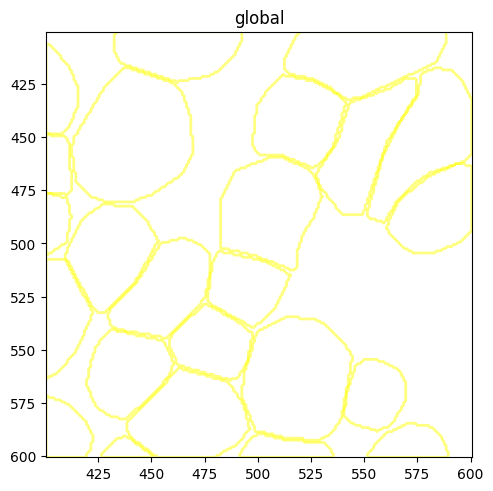

In [223]:
cropped_sdata.pl.render_shapes(element="vectorized", color="red", fill_alpha=0.0, outline=True, outline_width=2.0, outline_color="yellow", outline_alpha=0.5).pl.show()

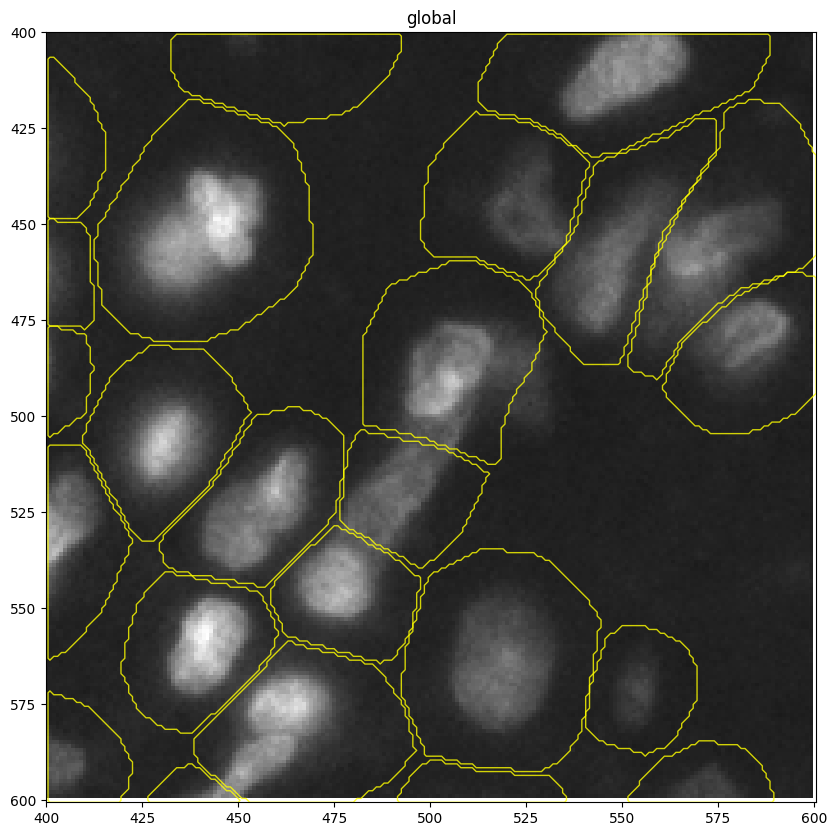

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cropped_sdata.pl.render_shapes(element="vectorized", fill_alpha=0.0, outline=True, outline_width=1.0, outline_color="yellow", outline_alpha=0.8).pl.show(ax=ax)
cropped_sdata.pl.render_images(element="image", channel=4, cmap="grey", alpha=0.9).pl.show(ax=ax)
plt.show()

In [240]:
import dask.array as da
import pims

In [241]:
image = pims.open('../data/projections/1002_projection.ome.tif')

In [242]:
image

<Frames>
Source: ../data/projections/1002_projection.ome.tif
Length: 2 frames
Frame Shape: (48214, 92041)
Pixel Datatype: uint8

In [255]:
import dask_image.imread

In [256]:
dask_im = dask_image.imread.imread('../data/projections/1002_projection.ome.tif')

In [257]:
dask_im

dask.array<_map_read_frame, shape=(2, 48214, 92041), dtype=uint8, chunksize=(1, 48214, 92041), chunktype=numpy.ndarray>

In [258]:
dask_im.shape

(2, 48214, 92041)

In [259]:
parsed_dask_image = spatialdata.models.Image2DModel.parse(dask_im, dims=("c", "y", "x"))

In [260]:
parsed_dask_image

<xarray.DataArray 'image' (c: 2, y: 48214, x: 92041)> Size: 9GB
dask.array<_map_read_frame, shape=(2, 48214, 92041), dtype=uint8, chunksize=(1, 48214, 92041), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 16B 0 1
  * y        (y) float64 386kB 0.5 1.5 2.5 3.5 ... 4.821e+04 4.821e+04 4.821e+04
  * x        (x) float64 736kB 0.5 1.5 2.5 3.5 ... 9.204e+04 9.204e+04 9.204e+04
Attributes:
    transform:  {'global': Identity }

In [261]:
sdata_1002 = spatialdata.SpatialData()
sdata_1002['image'] = parsed_dask_image

In [262]:
sdata_1002

SpatialData object
└── Images
      └── 'image': DataArray[cyx] (2, 48214, 92041)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images)

In [263]:
dask_mask = dask_image.imread.imread('../data/masks/1002_mask.tif')

In [264]:
dask_mask

dask.array<_map_read_frame, shape=(1, 48214, 92041), dtype=float64, chunksize=(1, 48214, 92041), chunktype=numpy.ndarray>

In [266]:
dask_mask.rechunk((1, 2000, 2000))

dask.array<rechunk-merge, shape=(1, 48214, 92041), dtype=float64, chunksize=(1, 2000, 2000), chunktype=numpy.ndarray>

In [267]:
dask_mask = dask_mask[0,:,:]

In [269]:
dask_mask.rechunk((2000, 2000))

dask.array<rechunk-merge, shape=(48214, 92041), dtype=float64, chunksize=(2000, 2000), chunktype=numpy.ndarray>

In [270]:
dask_mask = dask_mask.astype('int32')

In [272]:
dask_mask.rechunk((2000, 2000))

dask.array<rechunk-merge, shape=(48214, 92041), dtype=int32, chunksize=(2000, 2000), chunktype=numpy.ndarray>

In [273]:
parsed_dask_mask = Labels2DModel.parse(dask_mask, dims=("y", "x"))

In [274]:
sdata_1002['labels'] = parsed_dask_mask

In [275]:
sdata_1002

SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (2, 48214, 92041)
└── Labels
      └── 'labels': DataArray[yx] (48214, 92041)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), labels (Labels)

In [276]:
sdata_1002['vectors'] = to_polygons(sdata_1002['labels'])

In [277]:
sdata_1002

SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (2, 48214, 92041)
├── Labels
│     └── 'labels': DataArray[yx] (48214, 92041)
└── Shapes
      └── 'vectors': GeoDataFrame shape: (1658830, 2) (2D shapes)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), labels (Labels), vectors (Shapes)

In [278]:
cropped_sdata_1002 = sdata_1002.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[26950, 27450],
    max_coordinate=[27150, 27650],
    target_coordinate_system="global",
    filter_table=False
)

In [282]:
cropped_sdata_1002['image']

<xarray.DataArray 'image' (c: 2, y: 200, x: 200)> Size: 80kB
dask.array<getitem, shape=(2, 200, 200), dtype=uint8, chunksize=(1, 200, 200), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 16B 0 1
  * y        (y) float64 2kB 0.5 1.5 2.5 3.5 4.5 ... 196.5 197.5 198.5 199.5
  * x        (x) float64 2kB 0.5 1.5 2.5 3.5 4.5 ... 196.5 197.5 198.5 199.5
Attributes:
    transform:  {'global': Sequence \n    Translation (x, y)\n        [26950....

In [286]:
gdf = cropped_sdata_1002['vectors']

In [287]:
gdf

,label,geometry
label,,
107546,107546,"POLYGON ((27000 27474.5, 26999.5 27474, 26999 ..."
107658,107658,"POLYGON ((27095 27458.5, 27094 27458.5, 27093 ..."
107681,107681,"POLYGON ((26939 27461.5, 26938 27461.5, 26937 ..."
107703,107703,"POLYGON ((27053 27461.5, 27052 27461.5, 27051 ..."
107718,107718,"POLYGON ((27121 27464.5, 27120 27464.5, 27119 ..."
107723,107723,"POLYGON ((27136 27473.5, 27135 27473.5, 27134 ..."
107769,107769,"POLYGON ((27179 27486.5, 27178 27486.5, 27177 ..."
107813,107813,"POLYGON ((26967 27479.5, 26966 27479.5, 26965...."
107821,107821,"POLYGON ((27077 27478.5, 27076.5 27478, 27076...."


In [288]:
xy = (27053,27537)

In [289]:
xy

(27053, 27537)

In [290]:
import geopandas as gpd
from shapely.geometry import Point
# filter out all shapes that do not contain the point
gdf = gdf[gdf.contains(Point(xy))]

In [296]:
gdf

,label,geometry
label,,
108063,108063,"POLYGON ((27060 27571.5, 27059 27571.5, 27058 ..."


In [292]:
cropped_sdata_1002['coi'] = spatialdata.models.ShapesModel.parse(gdf)

In [294]:
#load the table
df = pd.read_csv("../data/quantification/1002_quantification.csv")

In [297]:
df.head()

,CellID,std_750_bg,std_647_bg,std_555_bg,std_488_bg,std_DAPI_bg,std_Vimentin,std_CD3e,std_panCK,std_CD8,...,quantile75_DAPI_2,Y_centroid,X_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Orientation,Extent,Solidity
0,0,40.855304,51.954850,54.462252,140.523134,31.319745,26.653639,28.878765,12.820668,61.322233,...,142.0,24511.909739,11680.788599,421.0,27.247447,21.901737,0.594888,1.139380,88.183766,0.850505
1,1,34.520893,44.002835,41.898613,112.518023,25.327053,40.035903,34.176186,30.357128,83.461186,...,143.0,24516.205988,13510.017964,835.0,38.158620,28.284309,0.671251,-0.583676,109.840620,0.964203
2,2,31.506275,36.477315,41.050631,100.440220,34.448699,23.882140,30.995244,57.863103,69.784826,...,165.0,24580.832000,12212.482667,375.0,29.125741,16.914929,0.814078,1.251462,77.254834,0.944584
3,3,43.508735,56.625991,60.569457,171.392262,286.499338,32.612854,43.252029,256.741132,87.293724,...,370.0,24634.068167,10193.263023,1555.0,49.744769,41.089428,0.563663,0.955685,155.994949,0.955160
4,4,38.776579,52.863540,51.733074,212.403349,32.073864,30.907765,30.987915,17.375409,83.955151,...,143.0,24860.194690,11568.089971,678.0,32.229260,27.659042,0.513321,-0.507938,100.568542,0.958982


In [299]:
coi_table = df[df['CellID']==108063]

In [300]:
adata = AnnData(X=coi_table.iloc[:, 1:].values, var=pd.DataFrame(index=coi_table.columns[1:]))

In [306]:
cropped_sdata_1002['table'] = TableModel.parse(adata)

In [310]:
cropped_sdata_1002

SpatialData object
├── Images
│     └── 'image': DataArray[cyx] (2, 200, 200)
├── Labels
│     └── 'labels': DataArray[yx] (200, 200)
├── Shapes
│     ├── 'coi': GeoDataFrame shape: (1, 2) (2D shapes)
│     └── 'vectors': GeoDataFrame shape: (39, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (1, 84)
with coordinate systems:
    ▸ 'global', with elements:
        image (Images), labels (Labels), coi (Shapes), vectors (Shapes)

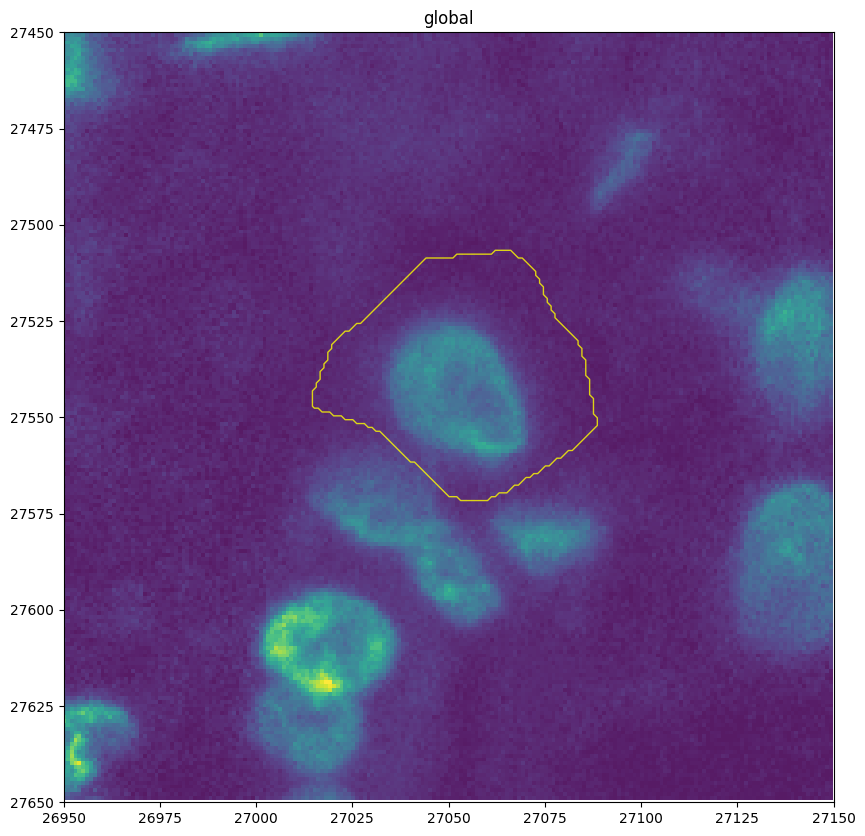

In [293]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cropped_sdata_1002.pl.render_shapes(element="coi", fill_alpha=0.0, outline=True, outline_width=1.0, outline_color="yellow", outline_alpha=0.8).pl.show(ax=ax)
cropped_sdata_1002.pl.render_images(element="image", channel=0, alpha=0.9).pl.show(ax=ax)
plt.show()

In [324]:
DAPI_related_columns = [col for col in list(cropped_sdata_1002['table'].var.index) if "DAPI" in col]

In [325]:
DAPI_related_columns

['std_DAPI_bg',
 'std_DAPI_1',
 'std_DAPI_2',
 'mean_DAPI_bg',
 'mean_DAPI_1',
 'mean_DAPI_2',
 'quantile25_DAPI_bg',
 'quantile25_DAPI_1',
 'quantile25_DAPI_2',
 'quantile50_DAPI_bg',
 'quantile50_DAPI_1',
 'quantile50_DAPI_2',
 'quantile75_DAPI_bg',
 'quantile75_DAPI_1',
 'quantile75_DAPI_2']

In [326]:
text = "Cell ID: 108063\n"
for column_key in DAPI_related_columns:
    text += f"{column_key}: {cropped_sdata_1002['table'].X[0][cropped_sdata_1002['table'].var.index.get_loc(column_key)]:.4g}\n"

print(text)

Cell ID: 108063
std_DAPI_bg: 38.41
std_DAPI_1: 33.21
std_DAPI_2: 41.15
mean_DAPI_bg: 86.77
mean_DAPI_1: 110.7
mean_DAPI_2: 103
quantile25_DAPI_bg: 57.25
quantile25_DAPI_1: 88
quantile25_DAPI_2: 73.25
quantile50_DAPI_bg: 82
quantile50_DAPI_1: 109
quantile50_DAPI_2: 99
quantile75_DAPI_bg: 110.8
quantile75_DAPI_1: 135
quantile75_DAPI_2: 130.8



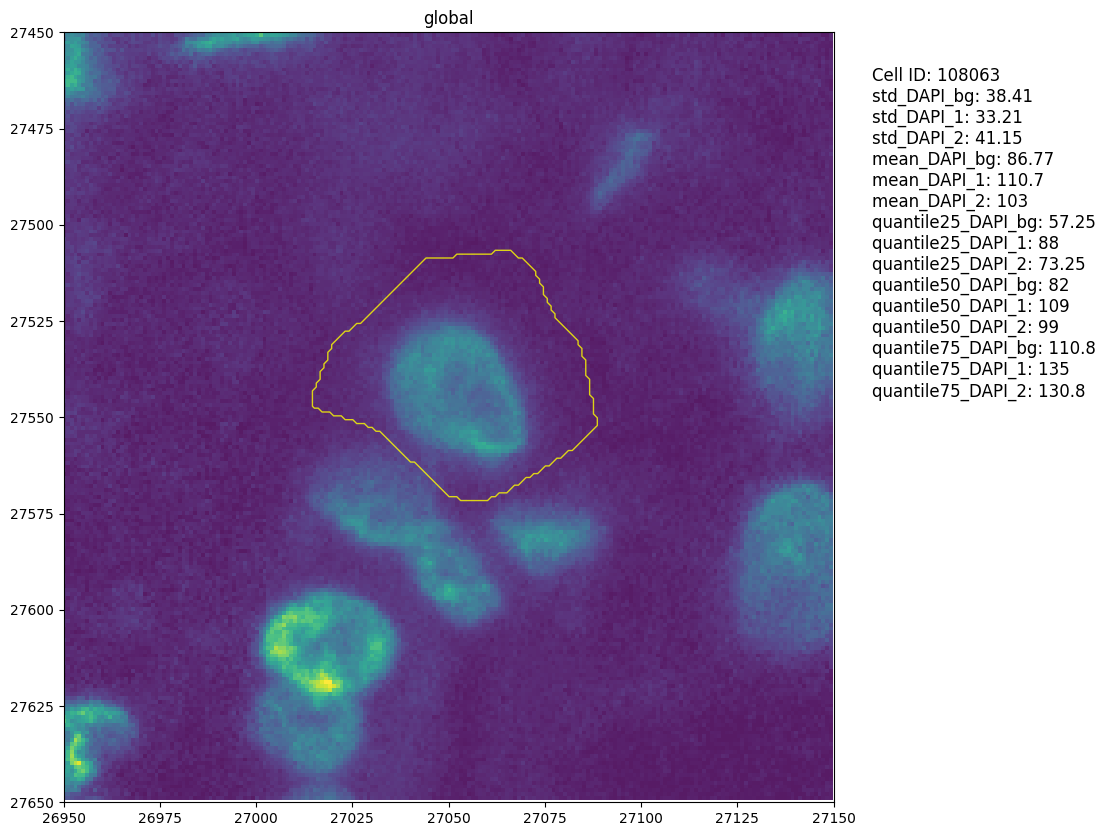

In [329]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cropped_sdata_1002.pl.render_shapes(element="coi", fill_alpha=0.0, outline=True, outline_width=1.0, outline_color="yellow", outline_alpha=0.8).pl.show(ax=ax)
cropped_sdata_1002.pl.render_images(element="image", channel=0, alpha=0.9).pl.show(ax=ax)


# string to be printed with values from table
text = "Cell ID: 108063\n"
for i, (key, value) in enumerate(zip(adata.var.index, adata.X[0])):
    text += f"{key}: {value}\n"
#plot values from table

text = "Cell ID: 108063\n"
for column_key in DAPI_related_columns:
    text += f"{column_key}: {cropped_sdata_1002['table'].X[0][cropped_sdata_1002['table'].var.index.get_loc(column_key)]:.4g}\n"

ax.text(1.05, 0.5, text, fontsize=12, transform=ax.transAxes)

plt.show()